In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
import openpyxl

In [2]:
# Load the HDI data
hdi = pd.read_json('/dataset/political/hdr-data.json')

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
0,AFG,Afghanistan,HDI,Human Development Index,,hdi,Human Development Index (value),1990,0.284,
1,AFG,Afghanistan,HDI,Human Development Index,,hdi,Human Development Index (value),1991,0.292,
2,AFG,Afghanistan,HDI,Human Development Index,,hdi,Human Development Index (value),1992,0.299,
3,AFG,Afghanistan,HDI,Human Development Index,,hdi,Human Development Index (value),1993,0.307,
4,AFG,Afghanistan,HDI,Human Development Index,,hdi,Human Development Index (value),1994,0.300,


In [ ]:
# View the first few rows of the data
hdi.head()

In [3]:
# Clean the data
hdi_cleaned = hdi.drop(columns=['countryIsoCode', 'indexCode', 'index', 'dimension', 'indicatorCode', 'indicator', 'note'])
selected_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
    'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea (Republic of)', 'Latvia',
    'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
    'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
    'Turkey', 'United Kingdom', 'United States'
]
hdi_cleaned = hdi_cleaned[hdi_cleaned["country"].isin(selected_countries)]
hdi_cleaned = hdi_cleaned[hdi_cleaned["year"] > 1989]
hdi_cleaned

,country,year,value
228,Australia,1990,0.864
229,Australia,1991,0.866
230,Australia,1992,0.868
231,Australia,1993,0.873
232,Australia,1994,0.873
...,...,...,...
5513,United States,2018,0.930
5514,United States,2019,0.933
5515,United States,2020,0.923
5516,United States,2021,0.921


In [4]:
# Check for null values
print("Amount of null values: ", hdi["value"].isnull().sum())
hdi["value"].describe()

Amount of null values:  0


count    6203.000000
mean        0.670330
std         0.164335
min         0.212000
25%         0.546000
50%         0.692000
75%         0.797000
max         0.967000
Name: value, dtype: float64

In [5]:
# Save the cleaned data
hdi_cleaned.to_csv('/dataset/political/hdi_cleaned.csv', index=False)

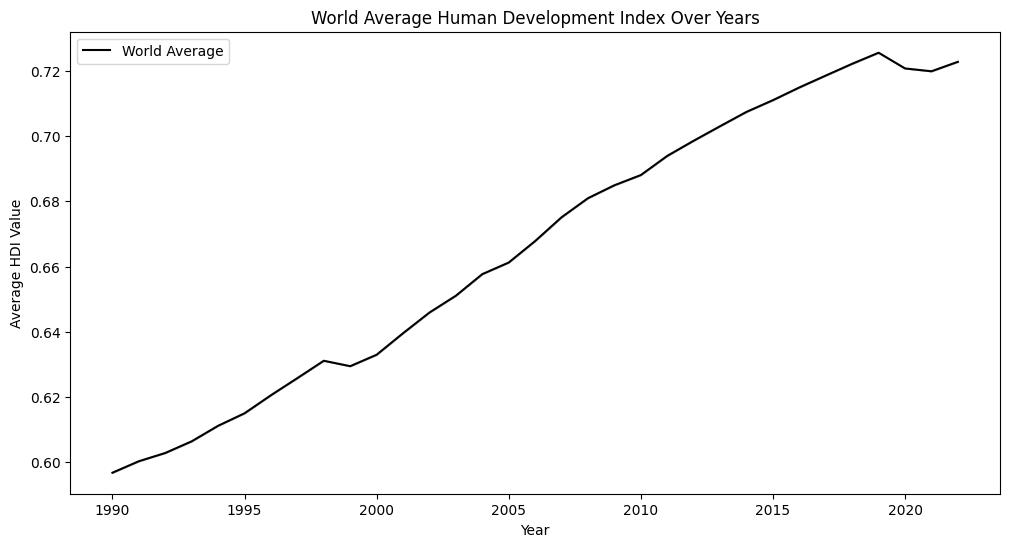

In [7]:
hdi["average"] = hdi.groupby("year")["value"].transform("mean")

# Plot the world average over the years
plt.figure(figsize=(12, 6))  # Set figure size for better visibility
sns.lineplot(x="year", y="average", data=hdi, color="black", label="World Average")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average HDI Value")
plt.title("World Average Human Development Index Over Years")
plt.legend()

# Show the plot
plt.show()

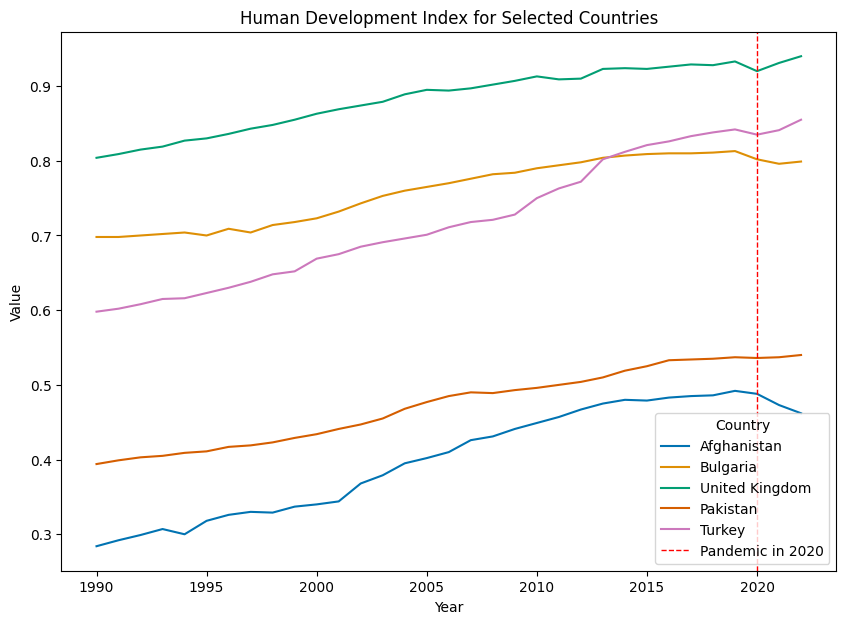

In [8]:
# Plot the HDI data for selected countries
Countries = ["Turkey","Bulgaria","United Kingdom", "Pakistan", "South Korea","Afghanistan","South Korea"]
sns.set_palette("colorblind")
plt.figure(figsize=(10, 7))
sns.lineplot(x="year", y="value", hue="country", data=hdi[hdi["country"].isin(Countries)])
plt.axvline(x=2020, color="red", linestyle="--", linewidth=1, label="Pandemic in 2020")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Human Development Index for Selected Countries")
plt.legend(title="Country")
plt.show()

In [9]:
hdi_cleaned = hdi.drop(columns=['countryIsoCode', 'indexCode', 'index', 'dimension', 'indicatorCode', 'indicator', 'note'])
hdi_cleaned

selected_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
    'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
    'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
    'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
]


# Filter the data to include only the selected countries
hdi_cleaned = hdi_cleaned[hdi_cleaned["country"].isin(selected_countries)]
hdi_cleaned = hdi_cleaned[hdi_cleaned["year"] > 1989]
hdi_cleaned

,country,year,value,average
228,Australia,1990,0.864,0.596771
229,Australia,1991,0.866,0.600294
230,Australia,1992,0.868,0.602824
231,Australia,1993,0.873,0.606399
232,Australia,1994,0.873,0.611163
...,...,...,...,...
4931,Sweden,2018,0.943,0.722187
4932,Sweden,2019,0.947,0.725580
4933,Sweden,2020,0.944,0.720758
4934,Sweden,2021,0.949,0.719889
